# PS 88 Week 3 Lab: Utility, Expected Utility, and Pivotal Voters

In this lab we will use tables to explore several of the topics covered in the lecture. First we will think about preferencs and utility with the aid of tables. Then we will move on to some expected utility calculations in the context of deciding what candidates to vote for (or whether to abstain) in an election. 

Next, we will start studying the question of when votes are more or less likely to be "pivotal" in elections by running simulations (again, aided by tables).

In [1]:
# Libraries we will use in the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import Table
from ipywidgets import interact
%matplotlib inline

First let's think about preferences in the context of the 2020 Democratic primary. There were tons of candidates that ran in 2020, so to keep things manageable let's restrict attention to the six who won at least one delegate. We will store them in a list called `cands`.

In [2]:
cands = ["Biden", "Sanders", "Warren", "Bloomberg", 
                             "Klobuchar", "Gabbard"]

A "complete" way to think about preferences is to create a table with every possible pair and then ask if our voter prefers A to B (and B to A).

Here is some code that makes a table with the pairs (don't sweat the details).

In [3]:
cand1 = []
cand2 = []
for i in range(len(cands)):
    for j in range(len(cands)):
        cand1 = np.append(cand1, cands[i])
        cand2 = np.append(cand2, cands[j])
pairs = Table().with_columns("Candidate 1", cand1, "Candidate 2", cand2)
pairs    


Candidate 1,Candidate 2
Biden,Biden
Biden,Sanders
Biden,Warren
Biden,Bloomberg
Biden,Klobuchar
Biden,Gabbard
Sanders,Biden
Sanders,Sanders
Sanders,Warren
Sanders,Bloomberg


Now let's add some preferences. In reality, we could go through and as a hypothetical voter "Do you like candidate 1 at least as much as candidate 2" 36 times, but for now I'm going to add an arbitrary preference, which I purposefully won't explain yet.

In [6]:
# Creating an arbitrary preference
pref1 = pairs.column("Candidate 1") >=  pairs.column("Candidate 2")
preftable1 = pairs.with_column("1pref2", pref1)
preftable1

Candidate 1,Candidate 2,1pref2
Biden,Biden,True
Biden,Sanders,False
Biden,Warren,False
Biden,Bloomberg,False
Biden,Klobuchar,False
Biden,Gabbard,False
Sanders,Biden,True
Sanders,Sanders,True
Sanders,Warren,False
Sanders,Bloomberg,True


As the nme indicates, the third column answers the question "is candidate 1 at least as good as candidate 2"?

Now we can implement the algorithm discussed in lecture to identify the rationalizable candidate for a voter with these preferences:
1. Pick a "potential best candidate"

2. Ask "is our potential best candidate at least as good as everyone else?" 

    2.1 If not, we are done. 
    
    2.2 If we find someone who is strictly better, call them the new potential best candidate, an repeat step 2

Let's do this, starting with Biden as our initial potential best candidate. 

To check if Biden is the best candidate, we can look at the table which compares him to the others

In [7]:
preftable1.where("Candidate 1", "Biden")

Candidate 1,Candidate 2,1pref2
Biden,Biden,True
Biden,Sanders,False
Biden,Warren,False
Biden,Bloomberg,False
Biden,Klobuchar,False
Biden,Gabbard,False


The second line tells us that Biden is not preferred to Sanders. 

So now let's see if Sanders is the best.

In [8]:
preftable1.where("Candidate 1", "Sanders")

Candidate 1,Candidate 2,1pref2
Sanders,Biden,True
Sanders,Sanders,True
Sanders,Warren,False
Sanders,Bloomberg,True
Sanders,Klobuchar,True
Sanders,Gabbard,True


Now we are down to one candidate preferre to Sanders, which is Warren. Let's see if she is best:

In [9]:
preftable1.where("Candidate 1", "Warren")

Candidate 1,Candidate 2,1pref2
Warren,Biden,True
Warren,Sanders,True
Warren,Warren,True
Warren,Bloomberg,True
Warren,Klobuchar,True
Warren,Gabbard,True


Since Warren is at least as good as any other choice, she is rationalizable!

**Question 1.1. Repeat this process, but with Gabbard as the initial potential best candidate. Do you reach the same conclusion, and why?**

In [10]:
# Code for 1.1
preftable1.where("Candidate 1", "Gabbard")

Candidate 1,Candidate 2,1pref2
Gabbard,Biden,True
Gabbard,Sanders,False
Gabbard,Warren,False
Gabbard,Bloomberg,True
Gabbard,Klobuchar,False
Gabbard,Gabbard,True


*Words for 1.1*

**Question 1.2. Now that you have seen what candidates are preferred to a few, you may be able to piece together the rule for the preferences of this voter. (You can also refer back to the code which produced the `pref1` variable as a hint, which tells you how Python interpets inequalities applied to strings!) What is the simplest way to describe this voter's preferences?**

*Words for 1.2*

**Question 1.3. Given your answer to 1.2, come up with a utility function which represents these preferences (i.e., assign a number to each candidate)**

*Answer to 1.3: add utility numbers to each candidate*

Biden:

Klobuchar:

Warren:

Sanders:

Gabbard:

Bloomberg:

We can also define a function that takes some candidates and a preference table as input, and then loops through and asks if this candidate is at least as good as everyone else.

In [11]:
def get_rationalizable(candlist,preftable):
    rat_cands = []
    for i in candlist:
        preftablei = preftable.where("Candidate 1", i)
        betterthani = sum(preftablei.column("1pref2"))
        if betterthani == len(candlist):
            rat_cands = np.append(rat_cands,i)
    return rat_cands

**Question 1.4. Use the `get_rationalizable` function to identify the rationalizable candidate given these preferences.**

In [12]:
# Code for 1.4
get_rationalizable(cands, preftable1)

array(['Warren'], dtype='<U32')

Now let's consider some alternate "preferences", where we will see why I added scare quotes soon.

In short, I'm going to make it so voter 2 has the same preferences as voter 1, except they strictly prefers Klobuchar to Warren. (Think about why this requires two "swaps!")

In [16]:
pref2=pref1
swap1 = (preftable1.column("Candidate 1") == "Klobuchar")*(preftable1.column("Candidate 2") == "Warren")
swap2 = (preftable1.column("Candidate 1") == "Warren")*(preftable1.column("Candidate 2") == "Klobuchar")
pref2[swap1] = 1
pref2[swap2] = 0
preftable2 = pairs.with_column("1pref2", pref2)

Unsurprisingly, now Warren is not preferred to all, which we can check using the same code as before but with `preftable1` replacing `preftable1`

In [36]:
preftable2.where("Candidate 1", "Warren")

Candidate 1,Candidate 2,1pref2
Warren,Biden,True
Warren,Sanders,True
Warren,Warren,True
Warren,Bloomberg,True
Warren,Klobuchar,False
Warren,Gabbard,True


How about Klobuchar?`

In [17]:
preftable2.where("Candidate 1", "Klobuchar")

Candidate 1,Candidate 2,1pref2
Klobuchar,Biden,True
Klobuchar,Sanders,False
Klobuchar,Warren,True
Klobuchar,Bloomberg,True
Klobuchar,Klobuchar,True
Klobuchar,Gabbard,True


...Sanders?

In [18]:
preftable2.where("Candidate 1", "Sanders")

Candidate 1,Candidate 2,1pref2
Sanders,Biden,True
Sanders,Sanders,True
Sanders,Warren,False
Sanders,Bloomberg,True
Sanders,Klobuchar,True
Sanders,Gabbard,True


It's starting to look like maybe no one is rationalizable? 

**Question 1.5. Run the `get_rationalizable` function for this preference table.**

In [21]:
# Code for 1.5
get_rationalizable(cands, preftable2)

[]

**Question 1.6. Is there a rationalizable choices given these "preferences"? If so, who? If not, why?**

*Answer to 1.6*

## Part 2: Utility with Tables

When the utilities associated with different choices are a function of several variables, it can be useful to keep track of this with a table. 

Let's keep using the example of the Democratic primary in 2020 (and the 6 candidates who won a delegate). Suppose that our voters care about three factors: (1) how liberal the candidate is, (2) the candidate gender, and (3) whether the candidate has experience in the executive branch of government.

Here is a table that contains this data for the candidates who won a delegate. (Note: I got the liberal measure from eyeballing a graphic in <a href="https://www.businessinsider.com/2020-democratic-presidential-candidates-political-spectrum-ranking-2019-5">this article</a>, which was based on a survey of voter perceptions.)

In [13]:
cands = Table().with_columns("Name", 
                            cands,
                           "Liberal",
                           [5,10,8,2,4,6],
                           "Female",
                           [0,0,1,0,1,1],
                           "Exec",
                           [1,0,0,1,0,0])
cands

Name,Liberal,Female,Exec
Biden,5,0,1
Sanders,10,0,0
Warren,8,1,0
Bloomberg,2,0,1
Klobuchar,4,1,0
Gabbard,6,1,0


Let' consider a voter Bob, who is quite liberal, would like there to be a female nominee, and also thinks executive experience is very important. We can capture this by giving Bob a utility function
$$
U_{bob} = -|Liberal - 9| + Female + 2 \cdot Exec
$$

The first term captures the idea that Bob likes candidates less whose liberalism score is far from 9, which we can think of as his "ideal liberalism" value (more on this in week 5!). This means he like candidate with a score of 9 best, and as their score gets farther away he likes them less.

The second and third terms mean he adds 1 to his utility of female candate, and 2 to those with executive experience. Here is how we can comput his utility for each candidate:

In [14]:
Ubob = -abs(cands.column("Liberal")-9) + cands.column("Female") + 2*cands.column("Exec")
Ubob

array([-2, -1,  0, -5, -4, -2])

Now let's create a new table to keep track of the utilities:

In [15]:
utils = cands.select("Name")
utils = utils.with_column("Ubob", Ubob)
utils

Name,Ubob
Biden,-2
Sanders,-1
Warren,0
Bloomberg,-5
Klobuchar,-4
Gabbard,-2


If we want to see who Bob likes best, one way is to sort the table in descending order

In [16]:
utils.sort("Ubob", descending=True)

Name,Ubob
Warren,0
Sanders,-1
Biden,-2
Gabbard,-2
Klobuchar,-4
Bloomberg,-5


So, it looks like Bob likes Warren best.

**Question 2.1. There are two candidates who Bob is indifferent between. Which two, and why?**

*Answer to 2.1*

Another way we can find the best candidate is by finding the one that gives Bob his maximum utility value. First, let's figure out what this is and save it as a variable called `maxUbob`.

In [17]:
maxUbob = np.max(utils.column("Ubob"))
maxUbob

0

And now we can use the `where` function to find candidates that maximize Bob's utility.

In [18]:
utils.where("Ubob", maxUbob)

Name,Ubob
Warren,0


Suppose a second voter named Anna has the following utility:
$$
U_{anna} = -|Liberal - 3| + 3 \cdot Exec
$$

**Question 2.2. What does this utility function mean for how Anna evaluates female vs male candidates?**


*Answer to 2.2*

**Question 2.3. Write code to (1) compute the utility the utility Anna assigns to each candidate, (2) add a column to the `utils` table with this information, and (3) determine which candidate Anna likes best.**

In [28]:
# Code for 2.3
Uanna= -abs(cands.column("Liberal")-4) + 0*cands.column("Female") + 3*cands.column("Exec")
utils = utils.with_column("Uanna", Uanna)
utils

Name,Ubob,Uanna
Biden,-2,2
Sanders,-1,-6
Warren,0,-4
Bloomberg,-5,1
Klobuchar,-4,0
Gabbard,-2,-2


*Words for 2.3*

**Question 2.4 Come up with a utility function which will make Sanders the most preferred candidate.**

In [ ]:
# Code for 2.4

## Part 3: Plotting expected utility

We can use Python to do expected utility calculations and explore the relationship between parameters in decision models and optimal choices. 

In class we showed that the expected utility for voting for a preferred candidate can be written $p_1 b - c$. A nice way to do calculations like this is to first assign values to the variables:

In [19]:
p1=.6
b=100
c=2
p1*b-c

58.0

**Question 3.1. Write code to compute the expected utility to voting when $p_1 = .5$, $b=50$, and $c=.5$**

In [20]:
#Answer to 2.1 here
p1=.5
b=50
c=.5
p1*b-c

24.5

We don't necessarily care about these expected utilities on their own, but how they compare to the expected utility to abstaining, which is equal to $p_0 b$. 

**Question 3.2. If $b=50$ and $p_0 = .48$, write code to compute the expected utility to abstaining.**

In [21]:
# Code for 3.2 here
p0=.48
b=50
p0*b

24.0

**Question 3.3. Given 3.1 and 3.2, is voting the expected utility maximizing choice given given these parameters?**

*Answer to 3.3 here*

We can also use the graphic capabilities of Python to learn more about how these models work. 

The following block of code plots the expected utility for voting (solid line) and abstaining (dashed line) as a function of the voting cost.

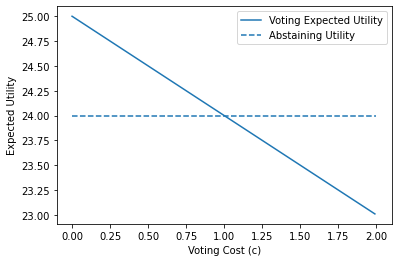

In [22]:
b=50
p0=.48
plt.hlines(p0*b, 0,2, label='Abstaining Utility',linestyles="dashed")
p1=.5
c = np.arange(0,2, step=.01)
y = p1*b-c
plt.ticklabel_format(style='plain')
plt.plot(c,y, label='Voting Expected Utility')
plt.xlabel('Voting Cost (c)')
plt.ylabel('Expected Utility')
plt.legend()

Note the abstaining utility is flat as the voting cost increases (since the expected utility to abstaining is not a function of $c$). However, the voting expected utility is decreasing in $c$.

**Question 3.4. From this graph, identify the values of $c$ where it is rational to vote (given these values of $p_0$, $p_1$, and $b$)**

*Answer to question 3.4*

**Question 3.5. (OPTIONAL) In the cell below, write some code which uses the calculating functions of python to verify your answer to the previous question**

In [33]:
# Code for 3.5 here

## Part 4: Simulating votes

How can we estimate the probability of a vote mattering? One route is to use probability theory, which in realistic settings (like the electoral college in the US) requires lots of complicated mathematical manipulation. Another way, which will often be faster and uses the tools you are learning in Data 8, is to run simulations.

As we will see throughout the class, simulation is an incredibly powerful tool that can be used for many purposes. For example, later in the class we will use simulation to see how different causal processes can produce similar data.

For now, we are going to use simulation to estimate the probability a vote matters. The general idea is simple. We will create a large number of "fake electorates" with parameters and randomness that we control, and then see how often an individual vote matters in these simulations. 

Before we get to voting, let's do a simple exercise as warmup. Suppose we want to simulate flipping a coin 10 times. To do this we can use the `random.binomial` function from `numpy` (imported above as `np`). This function takes two arguments: the number of flips (`n`) and the probability that a flip is "heads" (`p`). More generally, we often call $n$ the number of "trials" and $p$ the probability of "success".

The following line of code simulates flipping a "fair" (i.e., $p=.5$) coin 10 times. Run it a few times.

In [25]:
# First number argument is the number of times to flip, the second is the probability of a "heads"
np.random.binomial(n=10, p=.5)

3

We can simulate 100 coin flips at a time by changing the `n` argument to 100. The output tells us how many of these simulated coin flips came up heads. Run it a few times to see what happens for different simulations.

In [27]:
np.random.binomial(n=100, p=.5)

47

In the 2020 election, about 158.4 million people voted. This is a big number to have to keep typing, so let's define a variable: 

In [28]:
voters2020 = 158400000

**Question 4.1. Write a line of code to simulate 158.4 million people flipping a coin and counting how many heads there are.**

In [29]:
# Code for 4.1 here
sim = np.random.binomial(n=voters2020, p=.5) #SOLUTION
sim

79200782

Of course, we don't care about coin flipping per se, but we can think about this as the number of "yes" votes if we have n people who vote for a candidate with probability $p$. In the 2020 election, about 51.3% of the voters voted fro Joe Biden. Let's do a simulated version of the election: by running `np.random.binomial` with 58.4 million trials and a probability of "success" of 51.3%. 

Coding note: sometimes we will include a line called `np.random.seed`. This ensures that our random number generator (while still effectively "random" if we only run it once) alway produces the same output.

In [33]:
np.random.seed(88)
joe_count = np.random.binomial(n=voters2020, p=.513) #SOLUTION
joe_count

81254368

In reality, Biden won 81.27 million votes. 

**Question 4.2. How close was your answer to the real election? Compare this to the cases where you flipped 10 coins at a time.**


*Answer to 4.2 here*

## Part 5. Pivotal votes.

Suppose that you are a voter in a population with 10 people who are equally likely to vote for candidate A or candidate B, and you prefer candidate A. If you turn out to vote, you will be pivotal if the other 10 are split evenly between the two candidates. How often will this happen?

We can answer this question by running a whole bunch of simulations where we effectively flip 10 coins and count how many heads there are. 

The following line runs the code to do 10 coin flips with `p=.5` 10,000 times, and stores the results in an array.(Don't worry about the details here: we will cover how to write "loops" like this later.)

In [34]:
ntrials=10000
trials10 = [np.random.binomial(n=10, p=.5) for _ in range(ntrials)]

Here is the ouput:

In [45]:
trials10

[5,
 7,
 6,
 6,
 6,
 4,
 4,
 5,
 7,
 1,
 3,
 7,
 5,
 7,
 4,
 5,
 5,
 3,
 6,
 4,
 6,
 2,
 3,
 5,
 4,
 8,
 7,
 7,
 2,
 6,
 7,
 6,
 4,
 5,
 8,
 4,
 5,
 5,
 5,
 4,
 7,
 5,
 4,
 2,
 5,
 3,
 6,
 6,
 7,
 3,
 2,
 4,
 5,
 6,
 4,
 4,
 4,
 3,
 4,
 7,
 3,
 3,
 2,
 6,
 9,
 3,
 6,
 4,
 4,
 7,
 8,
 6,
 5,
 5,
 6,
 2,
 3,
 6,
 7,
 8,
 5,
 4,
 5,
 4,
 3,
 6,
 4,
 2,
 6,
 8,
 7,
 4,
 7,
 5,
 7,
 5,
 2,
 4,
 3,
 4,
 4,
 6,
 7,
 4,
 6,
 3,
 3,
 6,
 4,
 5,
 9,
 5,
 7,
 4,
 4,
 3,
 5,
 8,
 5,
 2,
 6,
 2,
 4,
 8,
 3,
 4,
 1,
 6,
 2,
 4,
 2,
 3,
 8,
 7,
 6,
 8,
 5,
 3,
 6,
 6,
 6,
 8,
 6,
 6,
 4,
 6,
 4,
 1,
 8,
 4,
 7,
 5,
 7,
 5,
 7,
 5,
 8,
 7,
 7,
 8,
 6,
 4,
 4,
 3,
 3,
 1,
 3,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 4,
 6,
 2,
 6,
 4,
 5,
 5,
 5,
 6,
 6,
 4,
 6,
 5,
 3,
 4,
 5,
 6,
 5,
 4,
 4,
 5,
 6,
 4,
 4,
 6,
 6,
 2,
 5,
 4,
 5,
 3,
 5,
 6,
 4,
 6,
 4,
 5,
 5,
 5,
 8,
 5,
 3,
 6,
 3,
 7,
 2,
 3,
 7,
 3,
 6,
 5,
 5,
 5,
 4,
 3,
 4,
 6,
 6,
 6,
 7,
 6,
 7,
 3,
 8,
 5,
 7,
 2,
 6,
 5,
 4,
 4,
 2,
 7,
 4,


Let's put these in a table, and then make a histogram to see how often each trial number happens. To make sure we just get a count of how many are at each interval, we need to get the "bins" right.

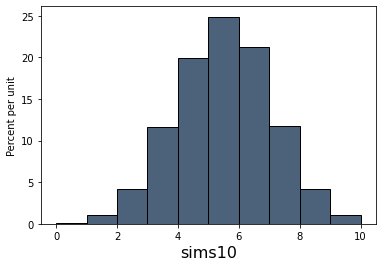

In [35]:
simtable = Table().with_column("sims10",trials10)
simtable.hist("sims10", bins=range(11))

Let's see what happens with 20 coin flips. First we create a bunch of simulations:

In [36]:
trials20 = [np.random.binomial(n=20, p=.5) for _ in range(ntrials)]

And then add the new trials to `simtable` using the `.with_column()` function.

In [37]:
simtable=simtable.with_column("sims20", trials20)
simtable

sims10,sims20
5,13
7,10
6,7
6,11
6,6
4,13
4,10
5,8
7,5
1,11


**Question 5.1 Make a histogram of the number of heads in the trials with 20 flips. Make sure to set the bins so there each one contains exactly one integer.**

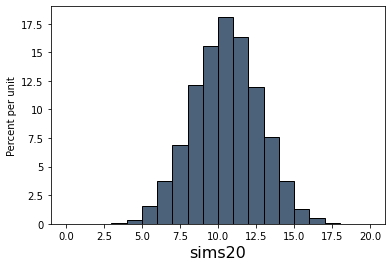

In [62]:
# Code for 5.1
simtable.hist("sims20", bins=range(21))

Let's see what this looks like with a different probability of success. Here is a set of 10 trials with a higher probaility of success ($p = .7$)

In [40]:
np.random.seed(88)
trials_high = [np.random.binomial(n=10, p=.7) for _ in range(ntrials)]

**Question 5.2. Add this array to `simtable`, as a variable called `sims_high`, and create a histogram which shows the frequency of heads in these trials**

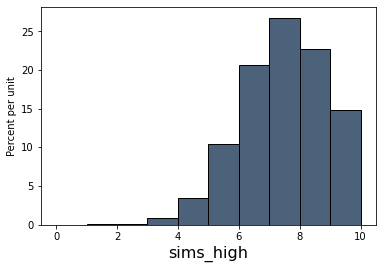

In [64]:
# Code for 5.2
simtable=simtable.with_column("sims_high", trials_high) # SOLUTION
simtable.hist("sims_high", bins=range(11)) # SOLUTION

**Question 5.3. Compare this to the histogram where $p=.5$**

*Answer to 5.3 here*

Next we want to figure out exactly how often a voter is pivotal in different situations. To do this, let's create a variable called `pivot10` which is true when there are exactly 5 other voters choosing each candidate.

In [54]:
simtable = simtable.with_column("pivot10", simtable.column("sims10")==5)
simtable

sims10,sims20,sims_high,pivot10
5,11,7,True
7,10,7,False
6,10,7,False
6,13,5,False
6,11,6,False
4,11,6,False
4,11,6,False
5,8,8,True
7,8,8,False
1,10,7,False


We can then count the number of trials where a voter was pivotal.

In [55]:
sum(simtable.column("pivot10"))

2488

Since there were 10,000 trials, we can convert this into a percentage:

In [56]:
sum(simtable.column("pivot10"))/ntrials

0.2488

**Question 5.4. Write code to determine what proportion of the time a voter is pivotal when $p=.5$ and $n=20$**

In [65]:
# Code for 5.4
simtable=simtable.with_column("pivot20", simtable.column("sims20")==10) # SOLUTION
pivotal_freq = sum(simtable.column("pivot20"))/ntrials # SOLUTION
pivotal_freq

0.1811

To explore how chaning the size of the electorate and the probabilities of voting affect the probability of being pivotal without having to go through all of these steps, we will define a function which does one simulation and then checks whether a new voter would be pivotal.

In [42]:
def one_pivot(n,p):
    return 1*(np.random.binomial(n=n,p=p)==n/2)

Run this a few times.

In [44]:
one_pivot(n=10, p=.6)

0

Let's see how the probability of being pivotal changes as the size of the electoral changes. To do so, we will use the same looping trick to store 10,000 simulations for different $n$. Here is code to simulate with $n=10$ (Note we defined `ntrials=10,000` above)

In [49]:
piv_trials10 = [one_pivot(n=10, p=.5) for _ in range(ntrials)]
sum(piv_trials10)/ntrials

0.246

**Question 5.5 Write code to simulate how often a voter is pivotal with $n=100$ and $n=1000000$. (Keep $p=.5$)**

In [50]:
# Code for n=100
piv_trials100 = [one_pivot(n=100, p=.4) for _ in range(ntrials)]
sum(piv_trials100)/ntrials

0.0113

In [55]:
# Code for n=1000000
piv_trials1mil = [one_pivot(n=1000000, p=.5) for _ in range(ntrials)]
sum(piv_trials1mil)/ntrials

0.0005

Now let's return to the $n=10$ case, and see what happens when we change $p$. Write code to simulate how often a voter in an electorate of 10 will be pivotal with $p=.2$, $p=.4$, and $p=.6$

In [56]:
piv_trialsp2 = [one_pivot(n=10, p=.2) for _ in range(ntrials)]
sum(piv_trialsp2)/ntrials

0.0249

**Question 5.6 Write a line of code to simulate how often a voter will be pivotal in an electorate with 50 voters and $p=.55$**

In [66]:
# Code for 5.6
piv_trialsp4 = [one_pivot(n=10, p=.4) for _ in range(ntrials)]
sum(piv_trialsp4)/ntrials

0.1997

In [60]:
piv_trialsp6 = [one_pivot(n=10, p=.6) for _ in range(ntrials)]
sum(piv_trialsp6)/ntrials

0.1997

In [53]:
piv_trials35 = [one_pivot(n=50, p=.55) for _ in range(ntrials)] # SOLUTION
pivotal_freq = sum(piv_trials35)/ntrials # SOLUTION
pivotal_freq

0.0862

**Question 5.7. Compare the probability of being pivotal for these values of $p$. What does this (and the analysis of the effect of changing $n$) tell you about what kinds of real world elections generate the highest probability of being pivotal.** 

*Answer to 5.7*

**Question 5.8 (Optional) make a plot of the probability of being pivotal with $n=10$ as a function of $p$**

**Question 5.9 (Optional) Try running the one_pivot function with an odd number of voters. What happens and why?**